***

# 1. Importing Packages and Reading Data  

***

## Importing Packages

**Below are the packages we need to load, view and visualize this specific HTML/PHP data into a pandas dataframe.**  


In [1]:
import requests
import lxml.html as lh
import pandas as pd
import numpy as np
from IPython.display import display, HTML
import matplotlib.pyplot as plt                        # required for data visualization purposes.
from bs4 import BeautifulSoup
import seaborn as sns                                  # required for data visualization purposes.

## **READING DATA**  


**To read data in the form of .html or .php, you need BeautifulSoup. https://archive.ics.uci.edu/ml/datasets.php is source of data**  

In [2]:
url = 'https://archive.ics.uci.edu/ml/datasets.php'
page = requests.get(url)
soup = BeautifulSoup(page.text, 'html.parser')
#print (soup.prettify())

In [3]:
header = soup.find("b", text="Name")
table = header.find_parent("table")
first = 0 
data = []
for row in table.find_all("tr"):
    data_list=[]
    for cell in row.find_all("td")[0:10]:
        data_list.append(cell.get_text(strip=True))
    if first == 0:
        columns = data_list
        first = 1
    else:
        if len(data_list) == 9:
            data.append(data_list[2:])

In [4]:
data = pd.DataFrame(data, columns=columns)
data.head()

,Name,Data Types,Default Task,Attribute Types,# Instances,# Attributes,Year
0,Abalone,Multivariate,Classification,"Categorical, Integer, Real",4177,8,1995
1,Adult,Multivariate,Classification,"Categorical, Integer",48842,14,1996
2,Annealing,Multivariate,Classification,"Categorical, Integer, Real",798,38,
3,Anonymous Microsoft Web Data,,Recommender-Systems,Categorical,37711,294,1998
4,Arrhythmia,Multivariate,Classification,"Categorical, Integer, Real",452,279,1998


* * *

# 2. Gathering Basic Info  

* * *


## A:   .info()
**To get basic info from the dataset, we use .info()**

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 469 entries, 0 to 468
Data columns (total 7 columns):
Name               469 non-null object
Data Types         469 non-null object
Default Task       469 non-null object
Attribute Types    469 non-null object
# Instances        469 non-null object
# Attributes       469 non-null object
Year               469 non-null object
dtypes: object(7)
memory usage: 12.9+ KB


## B:   .dtypes()
**To get datatypes of each column, we can use .dtypes**  

In [6]:
data.dtypes

Name               object
Data Types         object
Default Task       object
Attribute Types    object
# Instances        object
# Attributes       object
Year               object
dtype: object

## C:   .describe()
**To get more details about each column, we can use .describe()**  

In [7]:
data.describe()

,Name,Data Types,Default Task,Attribute Types,# Instances,# Attributes,Year
count,469,469,469,469,469,469,469
unique,469,40,20,9,379,148,32
top,Moral Reasoner,Multivariate,Classification,Real,,,2018
freq,1,250,252,168,34,62,53


## D:   .isnull().sum()
   
**We can check the number of null/empty values a column has by using .isnull().sum()**  

In [8]:
print (data.isnull().sum())

Name               0
Data Types         0
Default Task       0
Attribute Types    0
# Instances        0
# Attributes       0
Year               0
dtype: int64


## E:   .nunique()
  
**It is useful to see the number of unique values in each column using .nunique()**  

In [9]:
print (data.nunique())

Name               469
Data Types          40
Default Task        20
Attribute Types      9
# Instances        379
# Attributes       148
Year                32
dtype: int64


## F:   .value_counts()


In [10]:
print (data.Year.value_counts())

2018    53
2014    41
2016    40
2017    38
2013    33
        30
2015    27
2012    20
2011    18
2008    17
1999    17
1988    15
1990    11
2010    11
1994    10
1992     9
1998     9
1987     8
2009     8
1993     7
1989     7
1995     7
1996     5
2007     5
1997     5
2001     4
1991     4
2000     3
2019     3
2006     2
2003     1
2002     1
Name: Year, dtype: int64


***

# 3. Cleaning Data into Readable Format  

***
    
## A.   HTML/PHP cleaning
  
**We need to remove all of the empty columns and convert columns with numbers to float type.**  

In [11]:
data = data.replace('', np.nan)

for i in data.columns:
    if i== 'Name' or i=='Data Types' or i=='Default Task' or i=='Attribute Types':  
        data[i] = data[i].str.strip().astype('category')
    else:
        data[i] = data[i].astype(float)
        
data.head()

,Name,Data Types,Default Task,Attribute Types,# Instances,# Attributes,Year
0,Abalone,Multivariate,Classification,"Categorical, Integer, Real",4177.0,8.0,1995.0
1,Adult,Multivariate,Classification,"Categorical, Integer",48842.0,14.0,1996.0
2,Annealing,Multivariate,Classification,"Categorical, Integer, Real",798.0,38.0,NaN
3,Anonymous Microsoft Web Data,NaN,Recommender-Systems,Categorical,37711.0,294.0,1998.0
4,Arrhythmia,Multivariate,Classification,"Categorical, Integer, Real",452.0,279.0,1998.0


## B1:   .dtypes()
    
**Now after cleaning, lets look at the new data types and the mean, std, min, max etc. of all the columns again**

In [12]:
data.dtypes

Name               category
Data Types         category
Default Task       category
Attribute Types    category
# Instances         float64
# Attributes        float64
Year                float64
dtype: object

## B2:   .describe()

In [13]:
data.describe()

,# Instances,# Attributes,Year
count,4.350000e+02,4.070000e+02,439.000000
mean,5.483662e+05,2.429000e+04,2008.482916
std,3.967942e+06,2.219636e+05,9.933296
min,1.000000e+01,0.000000e+00,1987.000000
25%,3.290000e+02,9.000000e+00,1999.000000
50%,1.728000e+03,2.000000e+01,2013.000000
75%,1.764350e+04,6.900000e+01,2016.000000
max,6.300000e+07,3.231961e+06,2019.000000


***

# 4. Manipulating Data  

***

## Groupby

**Here we see 'Light' a good number of unique values to order by, therefore we can group by this columns and make good visualizations**  

***

# 5. Data Visualization  

***

**Using matplotlib.pyplot to make bar charts**

## A:   **General Plot**  
  
**Let us try to visualize all the data at once**  

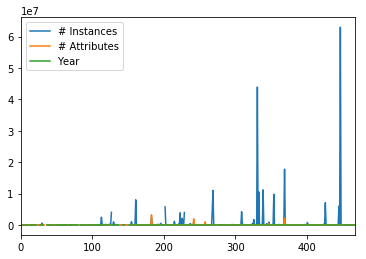

In [14]:
a = data.plot()
plt.show()

## B:   **Log Plot**  


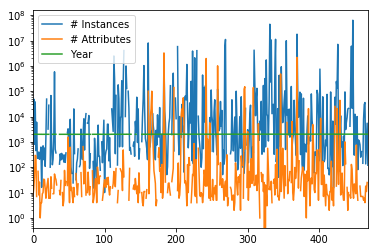

In [15]:
data.plot()
plt.yscale('log')

## C:   **Histogram**  


c:\users\mariam\appdata\local\programs\python\python37-32\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
c:\users\mariam\appdata\local\programs\python\python37-32\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


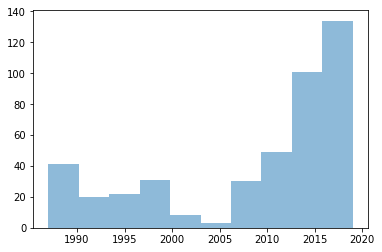

In [23]:
x = data["Year"]
num_bins = 10
n, bins, patches = plt.hist(x, num_bins, alpha=0.5)

## D:   **Scatter Plot**  

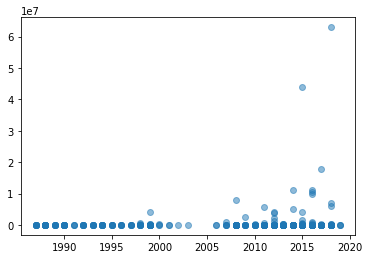

In [17]:
x = data['Year']
y = data['# Instances']
plt.scatter(x, y, alpha=0.5)

## E:   **Bar Graph**  
  
**A good way to visualize data of a column you wish to group by is to use .value_counts(). It gives a clear picture of how many would be in each group etc.**  

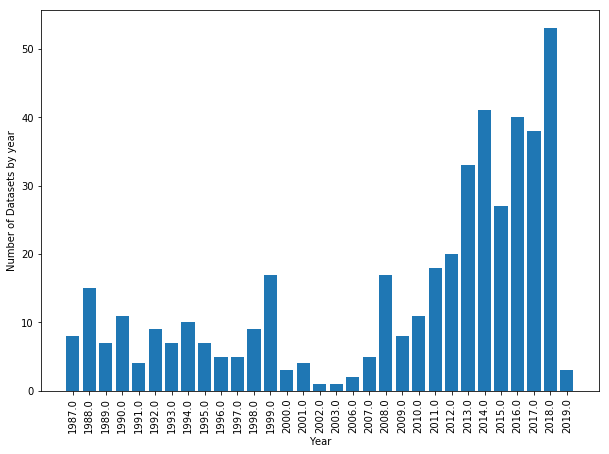

In [18]:
region =data.Year.value_counts().sort_index()
plt.figure(figsize=(10,7))
plt.bar(np.arange(len(region.index)),region.values)
plt.xticks(np.arange(len(region.index)), region.index)
plt.xticks(rotation=90)
plt.ylabel('Number of Datasets by year')
plt.xlabel('Year')
plt.show()

Causal-Discovery                                   4
Classification                                   252
Classification, Causal-Discovery                   2
Classification, Clustering                        47
Classification, Clustering, Causal-Discovery       2
Classification, Regression                        31
Classification, Regression, Clustering            14
Classification, Regression, Clustering, Causa      1
Clustering                                        14
Clustering, Causal-Discovery                       1
Function-Learning                                  1
Recommendation                                     1
Recommender-Systems                                2
Regression                                        43
Regression, Classification                         1
Regression, Clustering                             3
Regression, Clustering, Causal-Discovery           2
Regression, Description                            1
Relational-Learning                           

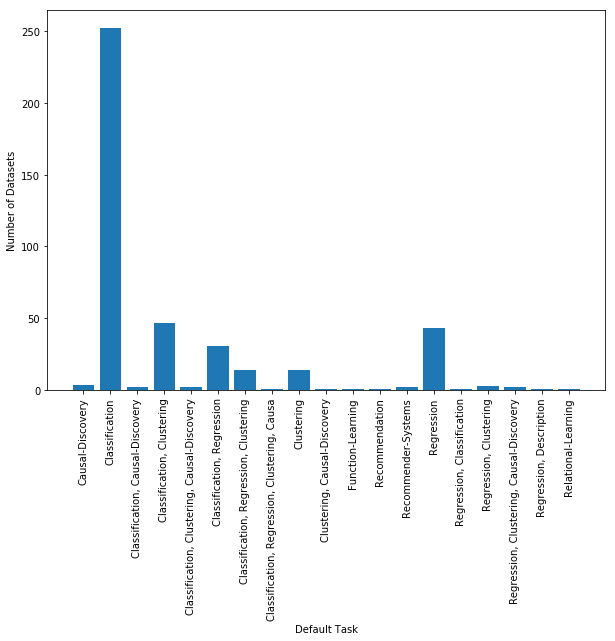

In [19]:
region =data['Default Task'].value_counts().sort_index()
print(region)
plt.figure(figsize=(10,7))
plt.bar(np.arange(len(region.index)),region.values)
plt.xticks(np.arange(len(region.index)), region.index)
plt.xticks(rotation=90)
plt.ylabel('Number of Datasets')
plt.xlabel('Default Task')
plt.show()

Categorical                    38
Categorical, Integer           28
Categorical, Integer, Real     20
Categorical, Real               6
Categorical, Real, Integer      1
Integer                        76
Integer, Real                  63
Real                          168
Name: Attribute Types, dtype: int64


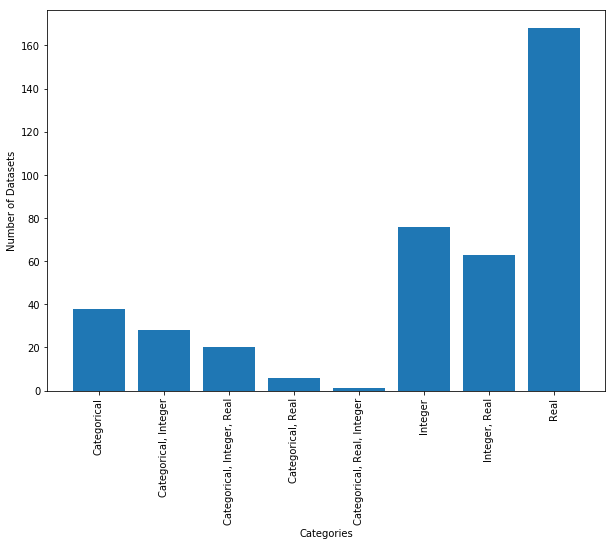

In [20]:
region =data['Attribute Types'].value_counts().sort_index()
print (region)
plt.figure(figsize=(10,7))
plt.bar(np.arange(len(region.index)),region.values)
plt.xticks(np.arange(len(region.index)), region.index)
plt.xticks(rotation=90)
plt.ylabel('Number of Datasets')
plt.xlabel('Categories')
plt.show()

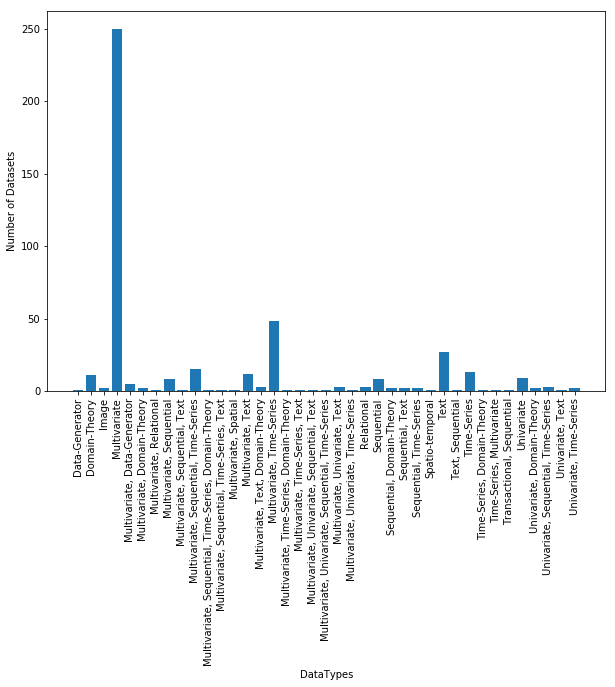

In [21]:
region =data['Data Types'].value_counts().sort_index()
plt.figure(figsize=(10,7))
plt.bar(np.arange(len(region.index)),region.values)
plt.xticks(np.arange(len(region.index)), region.index)
plt.xticks(rotation=90)
plt.ylabel('Number of Datasets')
plt.xlabel('DataTypes')
plt.show()

## F:   **Heatmap**  


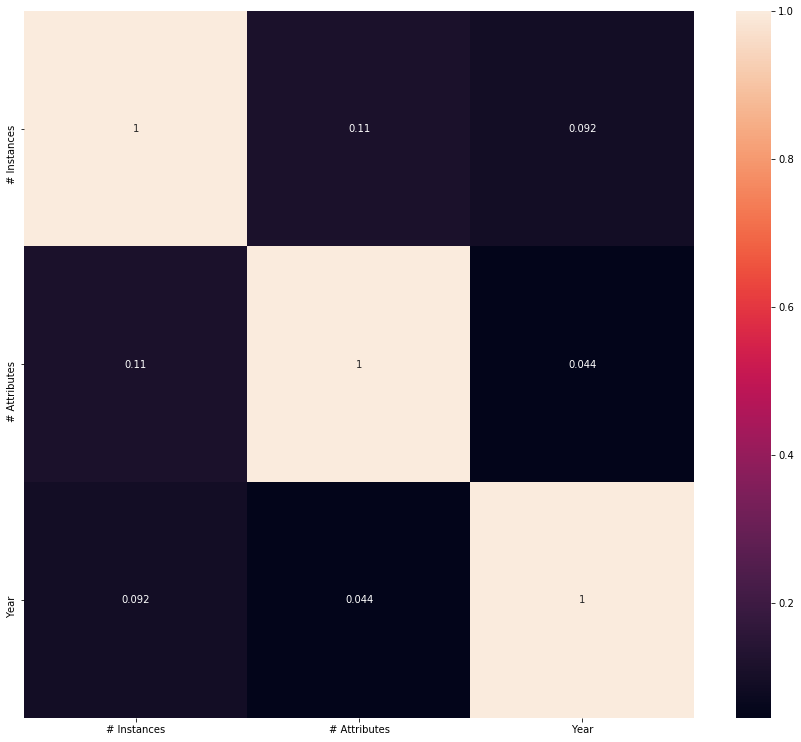

In [22]:
f,ax = plt.subplots(figsize=(15, 13))
sns.heatmap(data.corr(), annot=True, ax=ax)
plt.show()